In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [52]:
data=pd.read_csv('dataset/mnist_train.csv')

In [53]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)
data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]/255.0
data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]/255.0

In [55]:
Y_train,
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(784, 59000))

In [56]:
def init_params():
    W1=np.random.randn(10,784)*np.sqrt(1./784)
    b1=np.zeros((10,1))
    W2=np.random.randn(10,10)*np.sqrt(1./10)
    b2=np.zeros((10,1))
    return W1,b1,W2,b2
def ReLU(Z):
    return np.maximum(0,Z)
def Softmax(Z):
    Z_exp=np.exp(Z-np.max(Z,axis=0,keepdims=True))
    return Z_exp/np.sum(Z_exp,axis=0,keepdims=True)
def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=Softmax(Z2)
    return Z1,A1,Z2,A2
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    return one_hot_Y.T
def deriv_ReLU(Z):
    return Z>0
def back_prop(Z1,A1,Z2,A2,Y,W1,W2,X):
    m=Y.size
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dW2=(1/m)*dZ2.dot(A1.T) # (10,1000).(1000,10)=(10,10)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True) # (10,1)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1) # (10,10).(10,1000).(10,1000)=(10,1000)
    dW1=1/m*dZ1.dot(X.T) # (10,1000).(1000,784)=(10,784)
    db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True) # (10,1)
    return dW1,db1,dW2,db2
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

In [57]:
def get_predictions(A2):
    return np.argmax(A2,0)
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size
def gradient_descent(X,Y,iterations,alpha) :
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=back_prop(Z1,A1,Z2,A2,Y,W1,W2,X)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%10==0:
            print("Iteration:",i)
            print("Accuracy:",get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2

In [58]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,100,0.1) 

Iteration: 0
[6 4 5 ... 4 4 4] [0 0 6 ... 6 0 9]
Accuracy: 0.09705084745762711
Iteration: 10
[0 4 4 ... 6 4 9] [0 0 6 ... 6 0 9]
Accuracy: 0.31342372881355934
Iteration: 10
[0 4 4 ... 6 4 9] [0 0 6 ... 6 0 9]
Accuracy: 0.31342372881355934
Iteration: 20
[0 4 6 ... 6 0 9] [0 0 6 ... 6 0 9]
Accuracy: 0.4771864406779661
Iteration: 20
[0 4 6 ... 6 0 9] [0 0 6 ... 6 0 9]
Accuracy: 0.4771864406779661
Iteration: 30
[0 4 6 ... 6 0 7] [0 0 6 ... 6 0 9]
Accuracy: 0.6087118644067797
Iteration: 30
[0 4 6 ... 6 0 7] [0 0 6 ... 6 0 9]
Accuracy: 0.6087118644067797
Iteration: 40
[0 6 6 ... 8 0 7] [0 0 6 ... 6 0 9]
Accuracy: 0.7537118644067796
Iteration: 40
[0 6 6 ... 8 0 7] [0 0 6 ... 6 0 9]
Accuracy: 0.7537118644067796
Iteration: 50
[0 6 6 ... 8 0 7] [0 0 6 ... 6 0 9]
Accuracy: 0.7991694915254237
Iteration: 50
[0 6 6 ... 8 0 7] [0 0 6 ... 6 0 9]
Accuracy: 0.7991694915254237
Iteration: 60
[0 6 6 ... 8 0 7] [0 0 6 ... 6 0 9]
Accuracy: 0.8163898305084746
Iteration: 60
[0 6 6 ... 8 0 7] [0 0 6 ... 6 0 9]


In [59]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2=forward_prop(W1,b1,W2,b2,X)
    predictions=get_predictions(A2)
    return predictions
def test_predictions(index,W1,b1,W2,b2):
    current_image=X_train[:,index,None]
    prediction=make_predictions(current_image,W1,b1,W2,b2)
    label=Y_train[index]
    print("Prediction:",prediction)
    print("Label:",label)
    current_image=current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show() 

Prediction: [5]
Label: 8


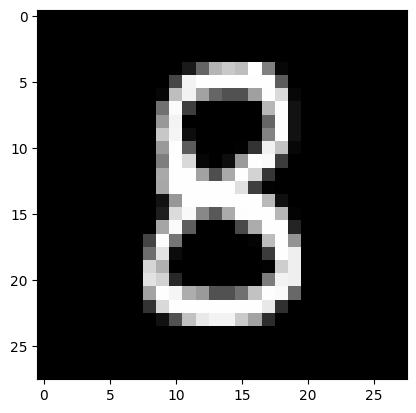

In [ ]:
test_predictions(43,W1,b1,W2,b2)
#change above no. to any other index to see other images

In [66]:
dev_predictions=make_predictions(X_dev,W1,b1,W2,b2)
print("Accuracy is :", get_accuracy(dev_predictions,Y_dev))

[8 8 3 2 9 9 1 4 1 2 0 0 1 3 3 4 4 2 9 8 1 0 1 1 1 1 7 2 3 1 3 8 4 0 1 1 1
 0 8 6 7 6 6 3 9 8 5 1 7 5 2 6 2 2 3 5 5 3 4 2 4 6 7 2 8 4 3 9 8 1 3 6 5 9
 4 8 8 4 7 4 0 2 7 8 8 1 6 4 7 5 6 8 4 5 6 4 0 1 4 0 0 0 8 0 5 9 9 1 3 0 5
 2 5 7 1 8 9 6 6 8 4 2 2 4 4 3 2 7 4 6 2 6 8 4 3 9 6 1 9 4 9 6 9 3 6 0 9 9
 9 9 7 2 8 8 9 9 1 6 6 6 3 4 4 4 8 5 1 5 6 5 1 2 2 9 2 6 8 3 0 8 1 4 2 6 5
 3 3 2 4 6 4 2 2 3 7 3 0 7 6 8 8 8 9 9 6 4 0 1 2 9 5 9 2 5 3 2 1 5 0 5 4 4
 3 4 8 2 2 9 8 2 9 8 4 2 2 1 8 8 6 5 3 6 2 2 1 5 8 2 4 0 4 7 9 0 3 8 4 0 2
 1 9 7 2 7 2 4 9 9 9 9 3 8 9 0 0 3 7 6 1 8 9 1 9 1 2 9 0 3 1 2 6 7 5 3 5 6
 3 0 9 8 4 6 0 7 6 3 0 6 0 6 1 2 6 9 2 5 1 2 3 9 2 4 2 1 7 4 2 0 9 3 9 5 3
 5 2 1 6 2 4 3 1 2 9 9 5 7 5 3 4 2 8 7 1 3 4 1 3 4 9 0 6 6 9 6 0 3 9 3 1 8
 7 6 5 1 3 4 8 9 9 2 0 6 1 8 9 7 2 0 0 4 0 8 7 0 6 9 0 5 1 4 1 8 0 3 7 8 0
 1 0 3 2 6 2 6 4 7 2 2 6 6 8 9 9 2 0 9 1 4 1 8 1 6 0 4 5 2 8 5 4 8 0 8 4 6
 6 7 8 6 3 4 5 9 0 9 7 6 9 2 1 4 3 1 3 1 2 3 8 3 8 3 6 2 5 8 9 1 8 5 6 2 2
 5 0 7 1 1 3 0 0 0 1 8 6 